<a href="https://colab.research.google.com/github/GeGou/TEDE/blob/project_2_2023-24/tede_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Υλοποιήθηκε απο τους : Γκούμα Γεώργιο με sdi1900243 και Μποκόρη Παρασκευά με sdi1900126

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!pip install langdetect
import pandas as pd
from langdetect import detect
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=d965b05987e1e4af41ae9137b0f93b9228ee0b3bea688973c42e4e7de765a940
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Ερώτημα 1: Study over time

# Pre-processing of the Data
Creation of reviews_2019.csv

In [14]:
# Load the CSV files for April, February and March
reviews_april = pd.read_csv('/content/drive/MyDrive/tede_project_1/data/2019/april/reviews.csv')
reviews_february = pd.read_csv('/content/drive/MyDrive/tede_project_1/data/2019/february/reviews.csv')
reviews_march = pd.read_csv('/content/drive/MyDrive/tede_project_1/data/2019/march/reviews.csv')

# Keep only the columns listing_id and comments
reviews_april = reviews_april[['listing_id', 'comments']]
reviews_february = reviews_february[['listing_id', 'comments']]
reviews_march = reviews_march[['listing_id', 'comments']]

# Merge of the dataframes
reviews_2019 = pd.concat([reviews_april, reviews_february, reviews_march], ignore_index=True)

# Pick a sample of 2000 rows
reviews_sample = reviews_2019.sample(n=500, random_state=42)

# function that keeps only the comments in english language
def is_english(comment):
    try:
        return detect(comment) == 'en'
    except:
        return False

# function that normalize the comments
def preprocess_comment(comment):
    # convert to lower case
    comment = comment.lower()
    # Removal of URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Removal of emojis
    comment = comment.encode('ascii', 'ignore').decode('ascii')
    # Removal of hashtags and symbols
    comment = re.sub(r'\@\w+|\#','', comment)
    # Removal of punctuation marks
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    # Removal of stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(comment)
    filtered_comment = [word for word in word_tokens if word not in stop_words]
    comment = ' '.join(filtered_comment)

    return comment

# Filtering and keeping only the english comments
reviews_sample = reviews_sample[reviews_sample['comments'].apply(is_english)]

# Preprocessing the comments
reviews_sample['comments'] = reviews_sample['comments'].apply(preprocess_comment)

# Store the final dataframe in a csv file
reviews_sample.to_csv('/content/drive/MyDrive/tede_project_2/2019/reviews_2019.csv', index=False)


Creation of reviews_2023.csv

In [15]:
# Load the CSV files for June, March and September
reviews_june = pd.read_csv('/content/drive/MyDrive/tede_project_1/data/2023/june/reviews.csv')
reviews_march = pd.read_csv('/content/drive/MyDrive/tede_project_1/data/2023/march/reviews.csv')
reviews_september = pd.read_csv('/content/drive/MyDrive/tede_project_1/data/2023/september/reviews.csv')

# Keep only the columns listing_id and comments
reviews_june = reviews_june[['listing_id', 'comments']]
reviews_march = reviews_march[['listing_id', 'comments']]
reviews_september = reviews_september[['listing_id', 'comments']]

# Merge of the dataframes
reviews_2023 = pd.concat([reviews_june, reviews_march, reviews_september], ignore_index=True)

# Pick a sample of 2000 rows
reviews_sample = reviews_2023.sample(n=500, random_state=42)

# function that keeps only the comments in english language
def is_english(comment):
    try:
        return detect(comment) == 'en'
    except:
        return False

# function that normalize the comments
def preprocess_comment(comment):
    # convert to lower case
    comment = comment.lower()
    # Removal of URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Removal of emojis
    comment = comment.encode('ascii', 'ignore').decode('ascii')
    # Removal of hashtags and symbols
    comment = re.sub(r'\@\w+|\#','', comment)
    # Removal of punctuation marks
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    # Removal of stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(comment)
    filtered_comment = [word for word in word_tokens if word not in stop_words]
    comment = ' '.join(filtered_comment)

    return comment

# Filtering and keeping only the english comments
reviews_sample = reviews_sample[reviews_sample['comments'].apply(is_english)]

# Preprocessing the comments
reviews_sample['comments'] = reviews_sample['comments'].apply(preprocess_comment)

# Store the final dataframe in a csv file
reviews_sample.to_csv('/content/drive/MyDrive/tede_project_2/2023/reviews_2023.csv', index=False)

# Load Data

In [16]:
import pandas as pd

# Load data
reviews_2019_df = pd.read_csv("/content/drive/MyDrive/tede_project_2/2019/reviews_2019.csv")
reviews_2023_df = pd.read_csv("/content/drive/MyDrive/tede_project_2/2023/reviews_2023.csv")

# Using the Hugging Face to mark emotions

    Using the Hugging Face Transformers library, we will apply emotion models to the 2019 and 2023 comments.

In [17]:
from transformers import pipeline
from concurrent.futures import ThreadPoolExecutor, as_completed

# Loading the sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis", tokenizer="finiteautomata/bertweet-base-sentiment-analysis", max_length=128, truncation=True)

# Function for flagging emotions
def annotate_sentiment(comments):
    sentiments = []
    for comment in comments:
        result = sentiment_pipeline(comment)[0]
        sentiments.append(result['label'])
    return sentiments

# Noting emotions for 2019
reviews_2019_df['sentiment'] = annotate_sentiment(reviews_2019_df['comments'].tolist())

# Noting emotions for 2023
reviews_2023_df['sentiment'] = annotate_sentiment(reviews_2023_df['comments'].tolist())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


# Creation of the final CSV

In [18]:
# Replace values ​​in 'sentiment' column
def replace_sentiment_labels(df):
    df['sentiment'] = df['sentiment'].replace({'POS': 'POSITIVE', 'NEG': 'NEGATIVE', 'NEU': 'NEUTRAL'})
    return df

reviews_2019_df = replace_sentiment_labels(reviews_2019_df)
reviews_2023_df = replace_sentiment_labels(reviews_2023_df)

# Create a DataFrame with the annotations for 2019 and 2023
reviews_2019_final = reviews_2019_df[['listing_id', 'comments', 'sentiment']]
reviews_2023_final = reviews_2023_df[['listing_id', 'comments', 'sentiment']]

# Save to CSV
reviews_2019_final.to_csv('/content/drive/MyDrive/tede_project_2/2019/reviews_2019_final.csv', index=False)
reviews_2023_final.to_csv('/content/drive/MyDrive/tede_project_2/2023/reviews_2023_final.csv', index=False)


# Comparison of emotions with the passage of time

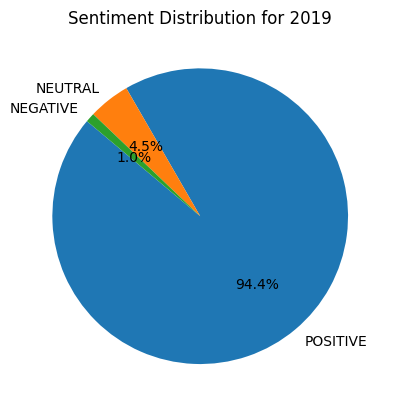

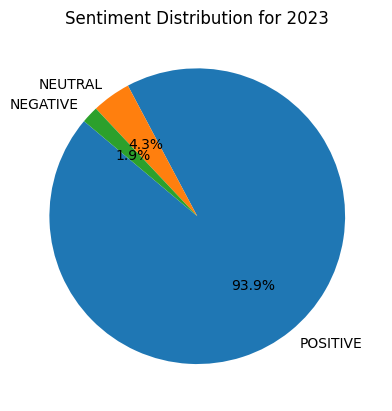

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
reviews_2019_final = pd.read_csv("/content/drive/MyDrive/tede_project_2/2019/reviews_2019_final.csv")
reviews_2023_final = pd.read_csv("/content/drive/MyDrive/tede_project_2/2023/reviews_2023_final.csv")

# Function to create pie charts
def plot_sentiment_distribution_pie(reviews, year):
    sentiment_counts = reviews['sentiment'].value_counts(normalize=True) * 100
    sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {year}')
    plt.ylabel('')  # Remove the y-axis label
    plt.show()

# Create and display the pie charts for 2019 and 2023
plot_sentiment_distribution_pie(reviews_2019_final, 2019)
plot_sentiment_distribution_pie(reviews_2023_final, 2023)


# Comparison of sentiment by neighborhood (BONUS)

   listing_id                                           comments sentiment  \
0    25624241  good location easy communicate spent one night...  POSITIVE   
1    25624241  good location easy communicate spent one night...  POSITIVE   
2    25624241  good location easy communicate spent one night...  POSITIVE   
3    18012163  easy get key safe etc room good size air condi...   NEUTRAL   
4    18012163  easy get key safe etc room good size air condi...   NEUTRAL   

  neighbourhood  
0      Pangrati  
1      Pangrati  
2      Pangrati  
3       Koukaki  
4       Koukaki  


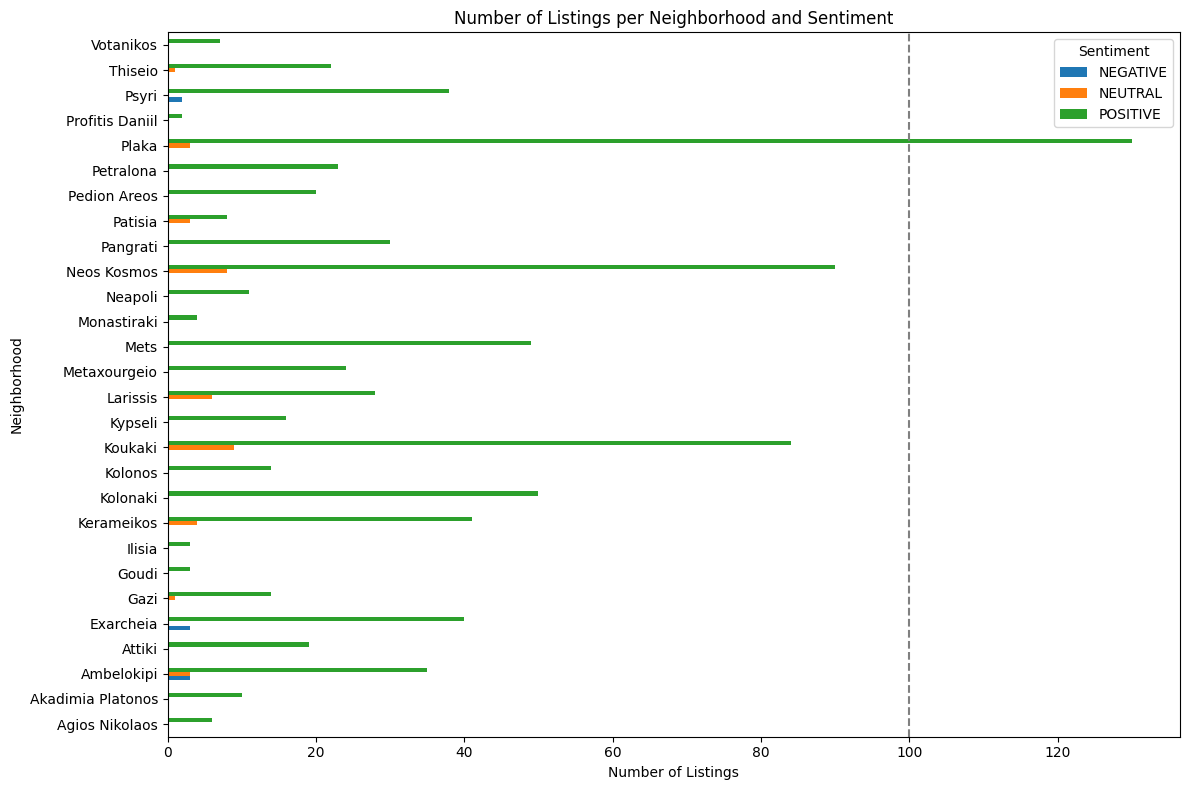

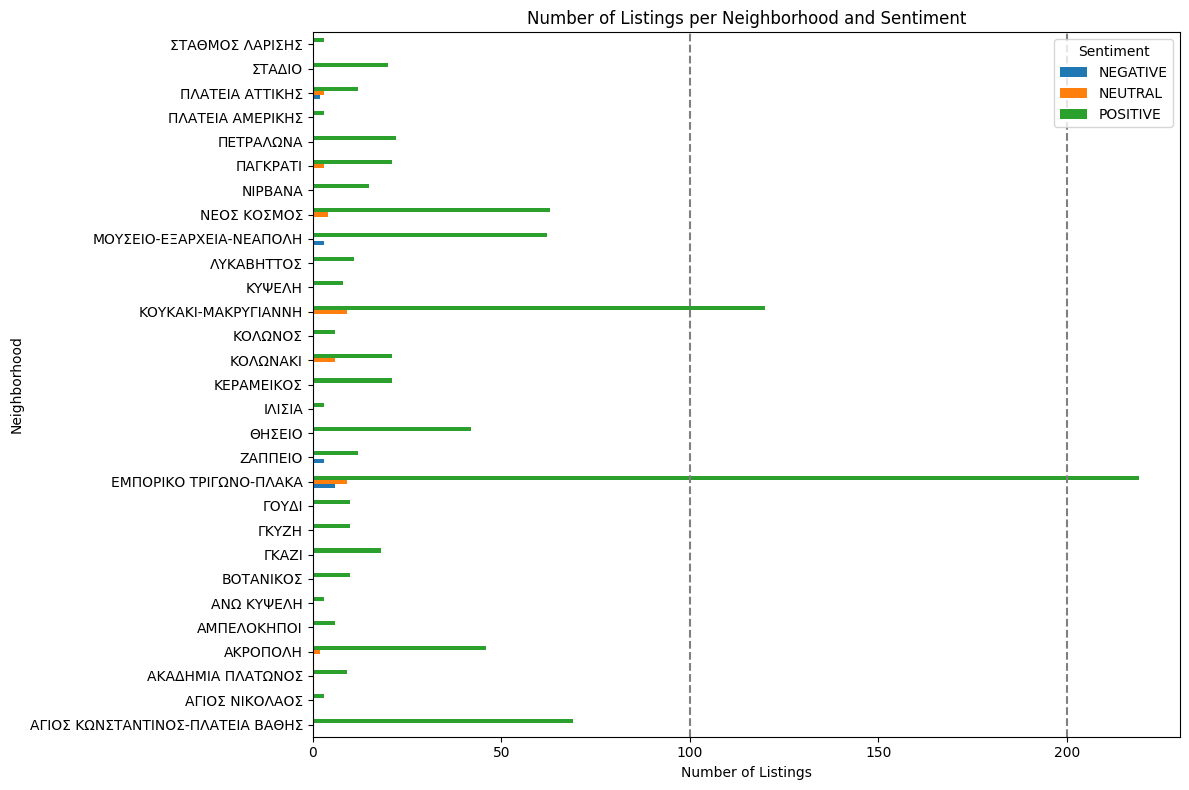

In [35]:
import pandas as pd

# Read the train_2019.csv file and keep only the id and neighbourhood columns
train_2019 = pd.read_csv("/content/drive/MyDrive/tede_project_1/data/2019/train_2019.csv", usecols=['id', 'neighbourhood'])
train_2023 = pd.read_csv("/content/drive/MyDrive/tede_project_1/data/2023/train_2023.csv", usecols=['id', 'neighbourhood'])

# Loading data reviews_2019_final
reviews_2019_final = pd.read_csv("/content/drive/MyDrive/tede_project_2/2019/reviews_2019_final.csv")
reviews_2023_final = pd.read_csv("/content/drive/MyDrive/tede_project_2/2023/reviews_2023_final.csv")

# Merge the reviews data with train_2019 to add the neighbourhood column
merged_data_2019 = reviews_2019_final.merge(train_2019, left_on='listing_id', right_on='id', how='inner')
merged_data_2019.drop(columns=['id'], inplace=True)
merged_data_2023 = reviews_2023_final.merge(train_2023, left_on='listing_id', right_on='id', how='inner')
merged_data_2023.drop(columns=['id'], inplace=True)

# Save the merged data to a new CSV file
merged_data_2019.to_csv("/content/drive/MyDrive/tede_project_2/2019/reviews_2019_with_neighbourhood.csv", index=False)
merged_data_2023.to_csv("/content/drive/MyDrive/tede_project_2/2023/reviews_2023_with_neighbourhood.csv", index=False)

# Display first lines for confirmation
print(merged_data_2019.head())

# Load data
reviews_2019_with_neighbourhood = pd.read_csv("/content/drive/MyDrive/tede_project_2/2019/reviews_2019_with_neighbourhood.csv")
reviews_2023_with_neighbourhood = pd.read_csv("/content/drive/MyDrive/tede_project_2/2023/reviews_2023_with_neighbourhood.csv")

# CHECK AGAIN !!!
def plot_sentiment_by_neighbourhood(reviews, year):
  # Group by neighborhood and month, then count the number of listings
  grouped_data = reviews.groupby(['neighbourhood', 'sentiment']).size().unstack(fill_value=0)

  # Calculate the maximum number of listings
  max_listings = grouped_data.max().max()

  # Plotting
  ax = grouped_data.plot(kind='barh', figsize=(12, 8))  # Use barh for horizontal bars
  plt.title('Number of Listings per Neighborhood and Sentiment')
  plt.xlabel('Number of Listings')
  plt.ylabel('Neighborhood')
  plt.legend(title='Sentiment')

  # Add dashed vertical lines for each 100 listings
  for i in range(100, max_listings + 1, 100):
      plt.axvline(x=i, color='gray', linestyle='--')

  plt.tight_layout()
  plt.show()


# def plot_sentiment_by_neighbourhood(reviews, year):
#     neighbourhoods = reviews['neighbourhood'].unique()
#     for neighbourhood in neighbourhoods:
#         neighbourhood_reviews = reviews[reviews['neighbourhood'] == neighbourhood]
#         sentiment_counts = neighbourhood_reviews['sentiment'].value_counts(normalize=True) * 100
#         sentiment_counts.plot(kind='bar', title=f'Sentiment Distribution in {neighbourhood} for {year}', ylabel='Percentage')
#         plt.show()

plot_sentiment_by_neighbourhood(reviews_2019_with_neighbourhood, 2019)
plot_sentiment_by_neighbourhood(reviews_2023_with_neighbourhood, 2023)


# Ερώτημα 2: Sentiment Analysis

# Split data and create train.tsv and test.tsv files

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Φόρτωση των δεδομένων
reviews_2019_final = pd.read_csv("/content/drive/MyDrive/tede_project_2/2019/reviews_2019_final.csv")
reviews_2023_final = pd.read_csv("/content/drive/MyDrive/tede_project_2/2023/reviews_2023_final.csv")

# Συγχώνευση των δεδομένων από τα έτη 2019 και 2023
all_reviews = pd.concat([reviews_2019_final, reviews_2023_final])

# Διαίρεση των δεδομένων σε train (80%) και test (20%)
train_data, test_data = train_test_split(all_reviews, test_size=0.2, random_state=42, stratify=all_reviews['sentiment'])

# Αποθήκευση σε αρχεία .tsv
train_data.to_csv('train.tsv', sep='\t', index=False)
test_data.to_csv('test.tsv', sep='\t', index=False)


# Preparation of features with TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Φόρτωση των δεδομένων
train_data = pd.read_csv('train.tsv', sep='\t')
test_data = pd.read_csv('test.tsv', sep='\t')

# Εφαρμογή του TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['comments'])
X_test_tfidf = vectorizer.transform(test_data['comments'])

# Αποθήκευση των χαρακτηριστικών σε αρχεία pickle
with open('X_train_tfidf.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)
with open('X_test_tfidf.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Αποθήκευση των labels
y_train = train_data['sentiment']
y_test = test_data['sentiment']
y_train.to_pickle('y_train.pkl')
y_test.to_pickle('y_test.pkl')


# Preparing features with Word Embeddings

In [38]:
import gensim.downloader as api
import numpy as np

# Φόρτωση του προεκπαιδευμένου μοντέλου word embeddings
word_vectors = api.load("glove-wiki-gigaword-50")

# Συνάρτηση για τον υπολογισμό του μέσου όρου των embeddings
def get_average_word_embeddings(text, model, vector_size=50):
    words = text.split()
    word_embeddings = [model[word] for word in words if word in model]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(vector_size)

# Εφαρμογή της συνάρτησης στα reviews
X_train_embeddings = np.vstack([get_average_word_embeddings(text, word_vectors) for text in train_data['comments']])
X_test_embeddings = np.vstack([get_average_word_embeddings(text, word_vectors) for text in test_data['comments']])

# Αποθήκευση των χαρακτηριστικών σε αρχεία pickle
with open('X_train_embeddings.pkl', 'wb') as f:
    pickle.dump(X_train_embeddings, f)
with open('X_test_embeddings.pkl', 'wb') as f:
    pickle.dump(X_test_embeddings, f)


[==================================================] 100.0% 66.0/66.0MB downloaded


# Εκπαίδευση και αξιολόγηση των μοντέλων

In [39]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Φόρτωση των χαρακτηριστικών και των labels
with open('X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf = pickle.load(f)
with open('X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf = pickle.load(f)
with open('X_train_embeddings.pkl', 'rb') as f:
    X_train_embeddings = pickle.load(f)
with open('X_test_embeddings.pkl', 'rb') as f:
    X_test_embeddings = pickle.load(f)
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

# Συνάρτηση για την εκπαίδευση και αξιολόγηση των μοντέλων
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    return model

# Εκπαίδευση και αξιολόγηση των μοντέλων με TF-IDF χαρακτηριστικά
print("TF-IDF Features:\n")

print("SVM:")
svm_model_tfidf = evaluate_model(SVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)

print("Random Forest:")
rf_model_tfidf = evaluate_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)

print("KNN:")
knn_model_tfidf = evaluate_model(KNeighborsClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)

# Εκπαίδευση και αξιολόγηση των μοντέλων με Word Embeddings χαρακτηριστικά
print("\nWord Embeddings Features:\n")

print("SVM:")
svm_model_embeddings = evaluate_model(SVC(), X_train_embeddings, y_train, X_test_embeddings, y_test)

print("Random Forest:")
rf_model_embeddings = evaluate_model(RandomForestClassifier(), X_train_embeddings, y_train, X_test_embeddings, y_test)

print("KNN:")
knn_model_embeddings = evaluate_model(KNeighborsClassifier(), X_train_embeddings, y_train, X_test_embeddings, y_test)


TF-IDF Features:

SVM:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.00      0.00      0.00         7
    POSITIVE       0.94      1.00      0.97       146

    accuracy                           0.94       155
   macro avg       0.31      0.33      0.32       155
weighted avg       0.89      0.94      0.91       155

Accuracy: 0.9419354838709677
Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.00      0.00      0.00         7
    POSITIVE       0.95      1.00      0.97       146

    accuracy                           0.94       155
   macro avg       0.32      0.33      0.32       155
weighted avg       0.89      0.94      0.92       155

Accuracy: 0.9419354838709677
KNN:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       1.00      0.14      0.25         7
    POSITIVE       0.95      1.00      0.97       146

    accuracy                           0.95       155
   macro avg       0.65      0.38      0.41       155
weighted avg       0.94      0.95      0.93       155

Accuracy: 0.9483870967741935

Word Embeddings Features:

SVM:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Evaluation with 10-fold Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

# Συνάρτηση για την εκτέλεση 10-fold Cross Validation
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f"10-fold Cross Validation Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

# 10-fold Cross Validation για TF-IDF χαρακτηριστικά
print("\n10-fold Cross Validation - TF-IDF Features:\n")

print("SVM:")
cross_validate_model(SVC(), X_train_tfidf, y_train)

print("Random Forest:")
cross_validate_model(RandomForestClassifier(), X_train_tfidf, y_train)

print("KNN:")
cross_validate_model(KNeighborsClassifier(), X_train_tfidf, y_train)

# 10-fold Cross Validation για Word Embeddings χαρακτηριστικά
print("\n10-fold Cross Validation - Word Embeddings Features:\n")

print("SVM:")
cross_validate_model(SVC(), X_train_embeddings, y_train)

print("Random Forest:")
cross_validate_model(RandomForestClassifier(), X_train_embeddings, y_train)

print("KNN:")
cross_validate_model(KNeighborsClassifier(), X_train_embeddings, y_train)



10-fold Cross Validation - TF-IDF Features:

SVM:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


10-fold Cross Validation Accuracy: 0.9416975145425701 (+/- 0.01522645603943605)
Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


10-fold Cross Validation Accuracy: 0.9416975145425701 (+/- 0.01522645603943605)
KNN:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


10-fold Cross Validation Accuracy: 0.9416975145425701 (+/- 0.01522645603943605)

10-fold Cross Validation - Word Embeddings Features:

SVM:
10-fold Cross Validation Accuracy: 0.9416975145425701 (+/- 0.01522645603943605)
Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


10-fold Cross Validation Accuracy: 0.9514278159703862 (+/- 0.024719244069590748)
KNN:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


10-fold Cross Validation Accuracy: 0.9449233209941831 (+/- 0.015426798354795752)
